# Notes

In [1]:
import pandas as pd
from constants import *
from sklearn.cluster import KMeans
from flows.specific.custom_flow_from_shapefile import  CustomFlowFromShapefile
import os
from data_sources.specific.coca import Coca
from data_sources.specific.gold_stock_price import GoldStockPrice
from data_sources.specific.mock_malaria_cases import Malaria
from embedders.specific.identity_embedder import IdentityEmbbeder
from embedders.specific.linear_regression_coefficient_embedder import LinearRegressionCoefficientEmbedder

from clusterers.specific.identity_clusterer import IdentityClusterer
from clusterers.specific.sklearn_vector_clusterer import SklearnVectorClusterer




/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
fuentes_incluidas = [GoldStockPrice, Coca, Malaria]

In [3]:
flow = CustomFlowFromShapefile(ID = 'basic_malaria',
                                name = "Basic Malaria",
                                time_resolution = MONTH,
                                shapefile_location = os.path.join(GEO_DATA_FOLDER,"municipalities/municipalities.shp"),
                                id_column = "muni_id",
                                vector_data_sources=fuentes_incluidas,
                                matrix_data_sources=[],
                                embedder=LinearRegressionCoefficientEmbedder(target_col='malaria_num_cases'),
                                clusterer=SklearnVectorClusterer(ID="kmeans", name="K-Means", sklearn_clusterer= KMeans(n_clusters=5)))


In [4]:

flow.initial_geography = flow.get_initial_geography()

# Loads Data
# ----------------------
flow.df_vector, flow.df_matrix = flow.loadData(flow.initial_geography)
flow.data_loaded = True


Loads Vector Data
Found 3 elements
   Extracts 1 of 3: Gold Stock Price (gold_stock_price) 
[*********************100%***********************]  1 of 1 completed
   Extracts 2 of 3: Coca (coca) 
   Loads Data
      No file found for year 2001
   Builds Overlay


/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/src/utils/geographic_functions.py:62: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  df_overlayed = geopandas.overlay(df_geo, df_values, how='intersection')


   Changes Time Resolution
   Extracts 3 of 3: Mock Malaria (malaria) 
Done

Loads Matrix Data
Found 0 elements
Done
------------------


In [5]:
flow.df_vector

,ID,date,gold_stock_price_value,coca_coca_total,malaria_num_cases
0,73563,2000-01-31,NaN,0.000000e+00,NaN
1,15362,2000-01-31,NaN,0.000000e+00,NaN
2,70823,2000-01-31,NaN,0.000000e+00,NaN
3,25307,2000-01-31,NaN,0.000000e+00,NaN
4,54109,2000-01-31,NaN,1.035077e+09,NaN
...,...,...,...,...,...
282739,68682,2021-12-31,1791.045443,NaN,NaN
282740,25662,2021-12-31,1791.045443,NaN,NaN
282741,20614,2021-12-31,1791.045443,NaN,NaN
282742,23574,2021-12-31,1791.045443,NaN,NaN


In [6]:

# Embbeds Data
# ----------------------
flow.embeddData()
flow.data_embedded = True

flow.df_embedded_vector

,ID,coca_coca_total,gold_stock_price_value
0,44847,0.018619,-0.015691
1,44110,0.005457,0.175924
2,44650,0.047925,0.052675
3,44560,-0.015988,0.115804
4,54172,0.000000,0.061412
...,...,...,...
1117,5483,-0.092064,0.046079
1118,5266,0.000000,-0.200004
1119,5480,0.098962,-0.132254
1120,5475,0.037084,0.020497


In [7]:
# Clusters Data
# ----------------------
flow.clusterData()
flow.data_clustered = True
flow.clustered_ids

,ID,cluster_id
0,44847,2
1,44110,1
2,44650,4
3,44560,1
4,54172,1
...,...,...
1117,5483,3
1118,5266,0
1119,5480,0
1120,5475,2


In [8]:
# Builds final geography
# ----------------------
flow.buildFinalGeography()


In [9]:
flow.final_geography

,ID,geometry
0,0,"MULTIPOLYGON (((-76.23610 0.66003, -76.23602 0..."
1,1,"MULTIPOLYGON (((-77.53767 0.89636, -77.53763 0..."
2,2,"MULTIPOLYGON (((-76.65143 0.25065, -76.65151 0..."
3,3,"MULTIPOLYGON (((-77.85547 1.32189, -77.85540 1..."
4,4,"MULTIPOLYGON (((-76.62614 1.05612, -76.62609 1..."


<AxesSubplot:>

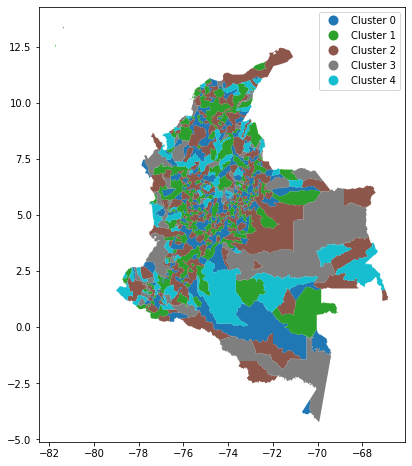

In [11]:
flow.final_geography[CLUSTER_ID] = flow.final_geography[ID].apply(lambda i : f"Cluster {i}")
flow.final_geography.plot(column = CLUSTER_ID, figsize = (8,8), legend=True)